In [62]:
import pandas as pd 
import numpy as np

In [63]:
df=pd.read_csv('synthetic_dataset.csv')

In [64]:
missing_values_count = df.isnull().sum()
print("--- Missing Values Count ---")
print(missing_values_count)

--- Missing Values Count ---
Category    2748
Price        174
Rating      2050
Stock       1352
Discount     392
dtype: int64


In [65]:

total_rows = len(df)
missing_percentage = (df.isnull().sum() / total_rows) * 100
print("\n--- Missing Value Percentages (%) ---")
print(missing_percentage.round(2))


--- Missing Value Percentages (%) ---
Category    63.00
Price        3.99
Rating      47.00
Stock       30.99
Discount     8.99
dtype: float64


In [66]:
df['Stock'] = df['Stock'].fillna('Missing')
df

,Category,Price,Rating,Stock,Discount
0,NaN,5548.0,1.870322,Missing,0.0
1,NaN,3045.0,4.757798,Missing,38.0
2,NaN,4004.0,NaN,In Stock,0.0
3,NaN,4808.0,1.492085,Missing,33.0
4,NaN,1817.0,NaN,Out of Stock,23.0
...,...,...,...,...,...
4357,NaN,4436.0,4.728335,Missing,49.0
4358,B,6236.0,NaN,Out of Stock,4.0
4359,NaN,3283.0,NaN,Out of Stock,9.0
4360,D,2999.0,4.425995,Missing,40.0


In [67]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
df["Discount"]=imputer.fit_transform(df[["Discount"]])
df


,Category,Price,Rating,Stock,Discount
0,NaN,5548.0,1.870322,Missing,0.0
1,NaN,3045.0,4.757798,Missing,38.0
2,NaN,4004.0,NaN,In Stock,0.0
3,NaN,4808.0,1.492085,Missing,33.0
4,NaN,1817.0,NaN,Out of Stock,23.0
...,...,...,...,...,...
4357,NaN,4436.0,4.728335,Missing,49.0
4358,B,6236.0,NaN,Out of Stock,4.0
4359,NaN,3283.0,NaN,Out of Stock,9.0
4360,D,2999.0,4.425995,Missing,40.0


In [68]:
imputer=SimpleImputer(strategy='mean')
df["price"]=imputer.fit_transform(df[["Price"]])
df["price_2dp"] = df["price"].round(2)
df

,Category,Price,Rating,Stock,Discount,price,price_2dp
0,NaN,5548.0,1.870322,Missing,0.0,5548.00000,5548.00
1,NaN,3045.0,4.757798,Missing,38.0,3045.00000,3045.00
2,NaN,4004.0,NaN,In Stock,0.0,4004.00000,4004.00
3,NaN,4808.0,1.492085,Missing,33.0,4808.00000,4808.00
4,NaN,1817.0,NaN,Out of Stock,23.0,1817.00000,1817.00
...,...,...,...,...,...,...,...
4357,NaN,4436.0,4.728335,Missing,49.0,4436.00000,4436.00
4358,B,6236.0,NaN,Out of Stock,4.0,6236.00000,6236.00
4359,NaN,3283.0,NaN,Out of Stock,9.0,3283.00000,3283.00
4360,D,2999.0,4.425995,Missing,40.0,2999.00000,2999.00


In [69]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
df["Rating"]=imputer.fit_transform(df[["Rating"]])
df

,Category,Price,Rating,Stock,Discount,price,price_2dp
0,NaN,5548.0,1.870322,Missing,0.0,5548.00000,5548.00
1,NaN,3045.0,4.757798,Missing,38.0,3045.00000,3045.00
2,NaN,4004.0,3.082060,In Stock,0.0,4004.00000,4004.00
3,NaN,4808.0,1.492085,Missing,33.0,4808.00000,4808.00
4,NaN,1817.0,3.082060,Out of Stock,23.0,1817.00000,1817.00
...,...,...,...,...,...,...,...
4357,NaN,4436.0,4.728335,Missing,49.0,4436.00000,4436.00
4358,B,6236.0,3.082060,Out of Stock,4.0,6236.00000,6236.00
4359,NaN,3283.0,3.082060,Out of Stock,9.0,3283.00000,3283.00
4360,D,2999.0,4.425995,Missing,40.0,2999.00000,2999.00


In [70]:
df['Category'] = df['Category'].fillna('Missing')
df = pd.get_dummies(df, columns=['Category'], prefix='Category', drop_first=True)
df


,Price,Rating,Stock,Discount,price,price_2dp,Category_B,Category_C,Category_D,Category_Missing
0,5548.0,1.870322,Missing,0.0,5548.00000,5548.00,False,False,False,True
1,3045.0,4.757798,Missing,38.0,3045.00000,3045.00,False,False,False,True
2,4004.0,3.082060,In Stock,0.0,4004.00000,4004.00,False,False,False,True
3,4808.0,1.492085,Missing,33.0,4808.00000,4808.00,False,False,False,True
4,1817.0,3.082060,Out of Stock,23.0,1817.00000,1817.00,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
4357,4436.0,4.728335,Missing,49.0,4436.00000,4436.00,False,False,False,True
4358,6236.0,3.082060,Out of Stock,4.0,6236.00000,6236.00,True,False,False,False
4359,3283.0,3.082060,Out of Stock,9.0,3283.00000,3283.00,False,False,False,True
4360,2999.0,4.425995,Missing,40.0,2999.00000,2999.00,False,False,True,False


In [71]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [72]:
df = pd.get_dummies(df, columns=['Stock'], prefix='Stock', drop_first=False)
df

,Price,Rating,Discount,price,price_2dp,Category_B,Category_C,Category_D,Category_Missing,Stock_In Stock,Stock_Missing,Stock_Out of Stock
0,5548.0,1.870322,0.0,5548.00000,5548.00,False,False,False,True,False,True,False
1,3045.0,4.757798,38.0,3045.00000,3045.00,False,False,False,True,False,True,False
2,4004.0,3.082060,0.0,4004.00000,4004.00,False,False,False,True,True,False,False
3,4808.0,1.492085,33.0,4808.00000,4808.00,False,False,False,True,False,True,False
4,1817.0,3.082060,23.0,1817.00000,1817.00,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4357,4436.0,4.728335,49.0,4436.00000,4436.00,False,False,False,True,False,True,False
4358,6236.0,3.082060,4.0,6236.00000,6236.00,True,False,False,False,False,False,True
4359,3283.0,3.082060,9.0,3283.00000,3283.00,False,False,False,True,False,False,True
4360,2999.0,4.425995,40.0,2999.00000,2999.00,False,False,True,False,False,True,False


In [73]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [74]:
standard=StandardScaler()
df["Price_Standard"]=standard.fit_transform(df[["Price"]])
df

,Price,Rating,Discount,price,price_2dp,Category_B,Category_C,Category_D,Category_Missing,Stock_In Stock,Stock_Missing,Stock_Out of Stock,Price_Standard
0,5548.0,1.870322,0.0,5548.00000,5548.00,False,False,False,True,False,True,False,0.187005
1,3045.0,4.757798,38.0,3045.00000,3045.00,False,False,False,True,False,True,False,-0.694442
2,4004.0,3.082060,0.0,4004.00000,4004.00,False,False,False,True,True,False,False,-0.356724
3,4808.0,1.492085,33.0,4808.00000,4808.00,False,False,False,True,False,True,False,-0.073590
4,1817.0,3.082060,23.0,1817.00000,1817.00,False,False,False,True,False,False,True,-1.126891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,4436.0,4.728335,49.0,4436.00000,4436.00,False,False,False,True,False,True,False,-0.204593
4358,6236.0,3.082060,4.0,6236.00000,6236.00,True,False,False,False,False,False,True,0.429289
4359,3283.0,3.082060,9.0,3283.00000,3283.00,False,False,False,True,False,False,True,-0.610629
4360,2999.0,4.425995,40.0,2999.00000,2999.00,False,False,True,False,False,True,False,-0.710642


In [75]:
minmax=MinMaxScaler()
df["Price_MinMax"]=minmax.fit_transform(df[["Price"]])
df

,Price,Rating,Discount,price,price_2dp,Category_B,Category_C,Category_D,Category_Missing,Stock_In Stock,Stock_Missing,Stock_Out of Stock,Price_Standard,Price_MinMax
0,5548.0,1.870322,0.0,5548.00000,5548.00,False,False,False,True,False,True,False,0.187005,0.550268
1,3045.0,4.757798,38.0,3045.00000,3045.00,False,False,False,True,False,True,False,-0.694442,0.297363
2,4004.0,3.082060,0.0,4004.00000,4004.00,False,False,False,True,True,False,False,-0.356724,0.394261
3,4808.0,1.492085,33.0,4808.00000,4808.00,False,False,False,True,False,True,False,-0.073590,0.475498
4,1817.0,3.082060,23.0,1817.00000,1817.00,False,False,False,True,False,False,True,-1.126891,0.173285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,4436.0,4.728335,49.0,4436.00000,4436.00,False,False,False,True,False,True,False,-0.204593,0.437910
4358,6236.0,3.082060,4.0,6236.00000,6236.00,True,False,False,False,False,False,True,0.429289,0.619784
4359,3283.0,3.082060,9.0,3283.00000,3283.00,False,False,False,True,False,False,True,-0.610629,0.321411
4360,2999.0,4.425995,40.0,2999.00000,2999.00,False,False,True,False,False,True,False,-0.710642,0.292715


In [76]:
robust=RobustScaler()
df["Price_Robust"]=robust.fit_transform(df[["Price"]])
df

,Price,Rating,Discount,price,price_2dp,Category_B,Category_C,Category_D,Category_Missing,Stock_In Stock,Stock_Missing,Stock_Out of Stock,Price_Standard,Price_MinMax,Price_Robust
0,5548.0,1.870322,0.0,5548.00000,5548.00,False,False,False,True,False,True,False,0.187005,0.550268,0.115142
1,3045.0,4.757798,38.0,3045.00000,3045.00,False,False,False,True,False,True,False,-0.694442,0.297363,-0.407433
2,4004.0,3.082060,0.0,4004.00000,4004.00,False,False,False,True,True,False,False,-0.356724,0.394261,-0.207213
3,4808.0,1.492085,33.0,4808.00000,4808.00,False,False,False,True,False,True,False,-0.073590,0.475498,-0.039355
4,1817.0,3.082060,23.0,1817.00000,1817.00,False,False,False,True,False,False,True,-1.126891,0.173285,-0.663813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,4436.0,4.728335,49.0,4436.00000,4436.00,False,False,False,True,False,True,False,-0.204593,0.437910,-0.117021
4358,6236.0,3.082060,4.0,6236.00000,6236.00,True,False,False,False,False,False,True,0.429289,0.619784,0.258782
4359,3283.0,3.082060,9.0,3283.00000,3283.00,False,False,False,True,False,False,True,-0.610629,0.321411,-0.357743
4360,2999.0,4.425995,40.0,2999.00000,2999.00,False,False,True,False,False,True,False,-0.710642,0.292715,-0.417036


In [77]:
new_file_name="processed_data.csv"
df.to_csv(new_file_name,index=False)

In [78]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Price vs Rating')

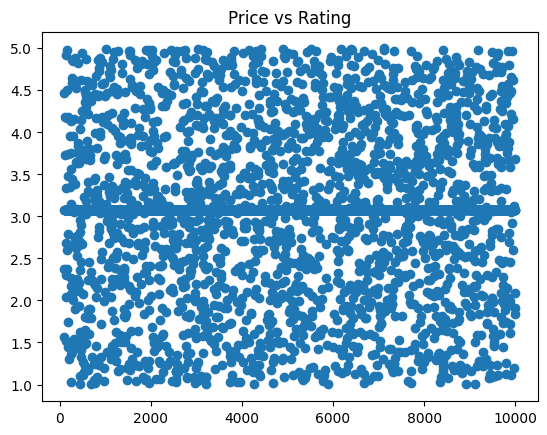

In [79]:
plt.scatter(df['Price'], df['Rating'])
plt.title('Price vs Rating')

In [80]:
import joblib
with open('scaler_standard.pkl', 'wb') as f:
    joblib.dump(standard, f)